In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [2]:
!pip3 install openpyxl

You should consider upgrading via the 'c:\users\vthakur\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
    )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [9]:
print(df_can.shape)

(195, 43)


In [6]:
df_can.dropna(axis=1, how = 'all', inplace = True)
df_can.dropna(inplace = True)

In [8]:
df_can.drop(df_can.tail(2).index, inplace = True)

In [10]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [11]:
# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [12]:
# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))


In [13]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

In [14]:
# add total column
df_can['Total'] = df_can.sum(axis=1)

In [15]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [16]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


In [17]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951.0,4363.0,3819.0,2671.0,2639.0,2650.0,3782.0,7494.0,7552.0,9894.0,...,27523.0,29188.0,28284.0,29890.0,34534.0,40892.0,35441.0,38083.0,38543.0,618948.0
Asia,31025.0,34314.0,30214.0,24696.0,27274.0,23850.0,28739.0,43203.0,47454.0,60256.0,...,159253.0,149054.0,133459.0,139894.0,141434.0,163845.0,146894.0,152218.0,155075.0,3317794.0
Europe,39760.0,44802.0,42720.0,24638.0,22287.0,20844.0,24370.0,46698.0,54726.0,60893.0,...,35955.0,33053.0,33495.0,34692.0,35078.0,33425.0,26778.0,29177.0,28691.0,1410947.0
Latin America and the Caribbean,13081.0,15215.0,16769.0,15427.0,13678.0,15171.0,21179.0,28471.0,21924.0,25060.0,...,24747.0,24676.0,26011.0,26547.0,26867.0,28818.0,27856.0,27173.0,24950.0,765148.0
Northern America,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,7705.0,6469.0,6790.0,...,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7677.0,7892.0,8503.0,241142.0


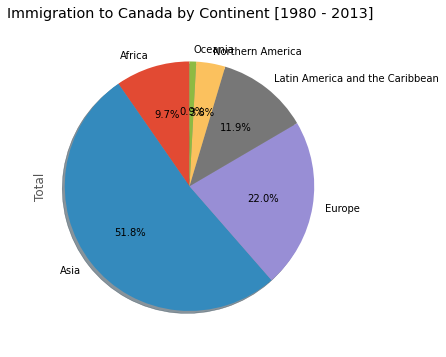

In [18]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

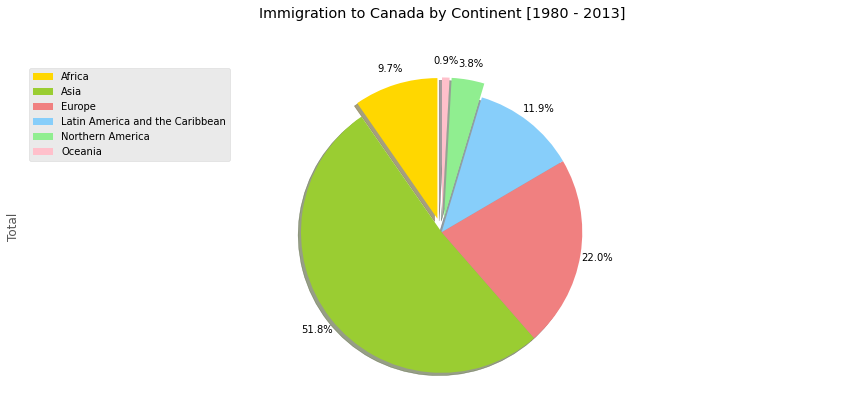

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


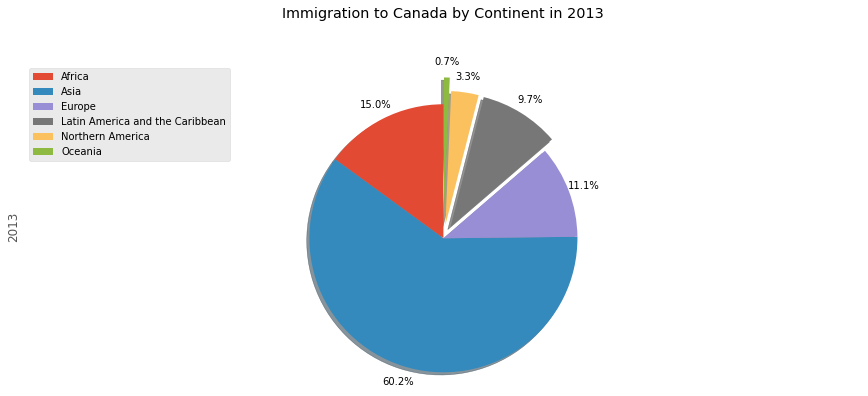

In [21]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# show plot
plt.show()

In [22]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701.0
1981,756.0
1982,598.0
1983,309.0
1984,246.0


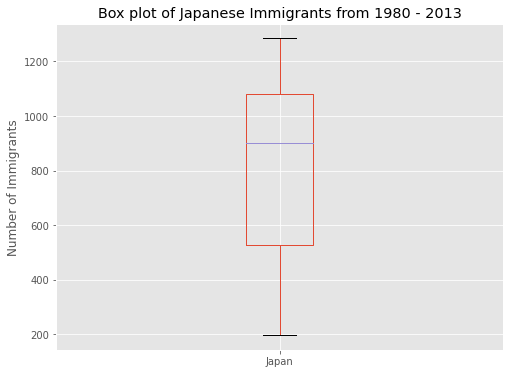

In [23]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [24]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [26]:
df_CI= df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123.0,8880.0
1981,6682.0,8670.0
1982,3308.0,8147.0
1983,1863.0,7338.0
1984,1527.0,5704.0


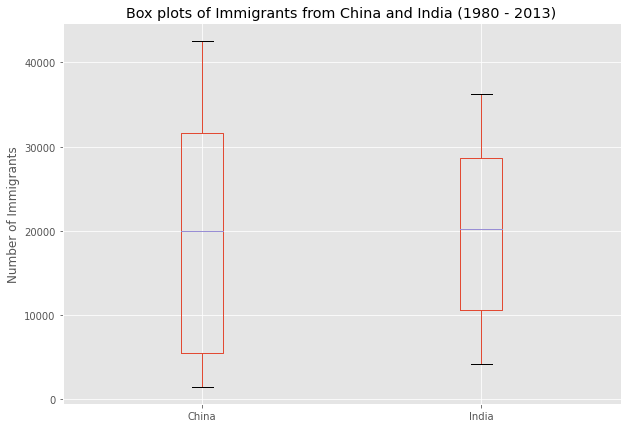

In [27]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

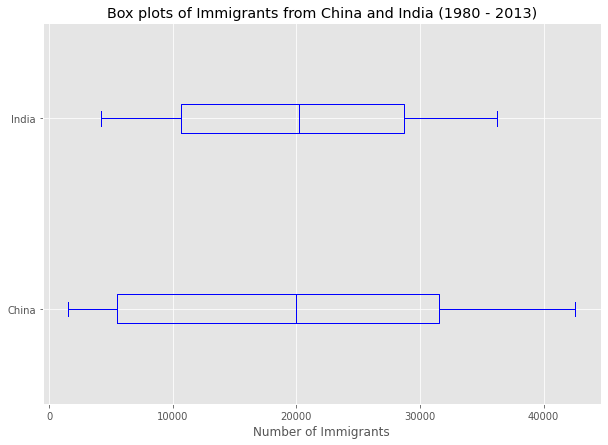

In [28]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

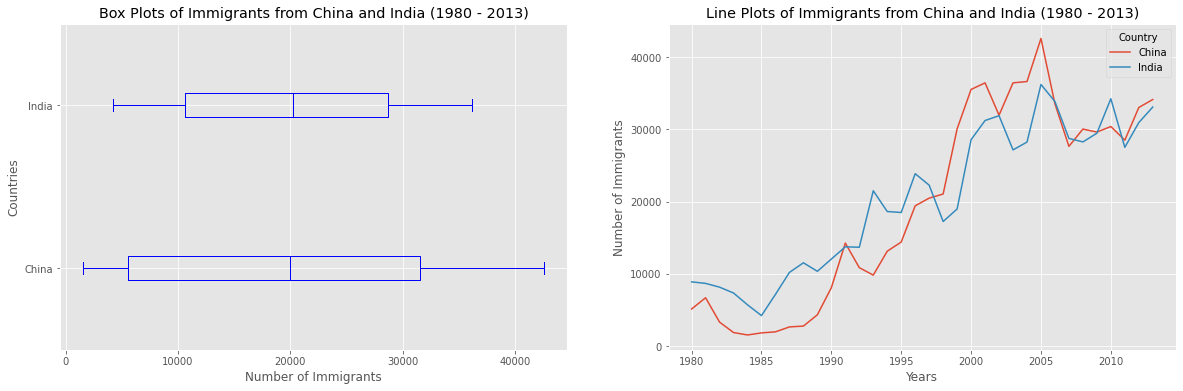

In [29]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

In [30]:
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Asia,Eastern Asia,Developing regions,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Asia,South-Eastern Asia,Developing regions,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Asia,Southern Asia,Developing regions,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0
United States of America,Northern America,Northern America,Developed regions,9378.0,10030.0,9074.0,7100.0,6661.0,6543.0,7074.0,...,8394.0,9613.0,9463.0,10190.0,8995.0,8142.0,7676.0,7891.0,8501.0,241122.0
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172.0,1429.0,1822.0,1592.0,1977.0,1648.0,1794.0,...,5837.0,7480.0,6974.0,6475.0,6580.0,7477.0,7479.0,7534.0,11291.0,175923.0
Sri Lanka,Asia,Southern Asia,Developing regions,185.0,371.0,290.0,197.0,1086.0,845.0,1838.0,...,4930.0,4714.0,4123.0,4756.0,4547.0,4422.0,3309.0,3338.0,2394.0,148358.0
Republic of Korea,Asia,Eastern Asia,Developing regions,1011.0,1456.0,1572.0,1081.0,847.0,962.0,1208.0,...,5832.0,6215.0,5920.0,7294.0,5874.0,5537.0,4588.0,5316.0,4509.0,142581.0


In [31]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154.0,180395.0,303591.0
China,32003.0,161528.0,340385.0
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,83413.0
Philippines,60764.0,138482.0,172904.0
Pakistan,10591.0,65302.0,127598.0


In [32]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


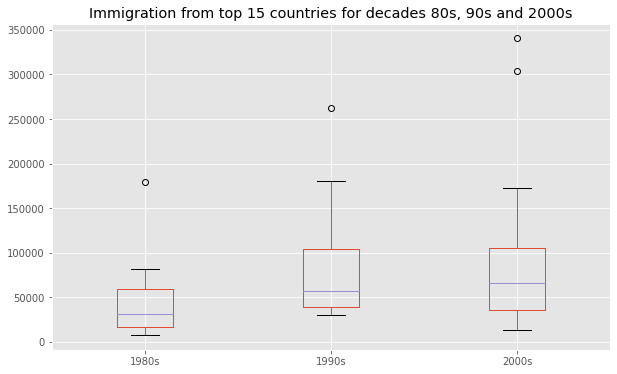

In [33]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

In [34]:
# let's check how many entries fall above the outlier threshold 
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154.0,180395.0,303591.0
1,China,32003.0,161528.0,340385.0


# SCATTER PLOTS

In [36]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [38]:
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

In [40]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

In [42]:
# rename columns
df_tot.columns = ['year', 'total']

In [43]:
df_tot.head()

,year,total
0,1980,99137.0
1,1981,110563.0
2,1982,104271.0
3,1983,75550.0
4,1984,73417.0


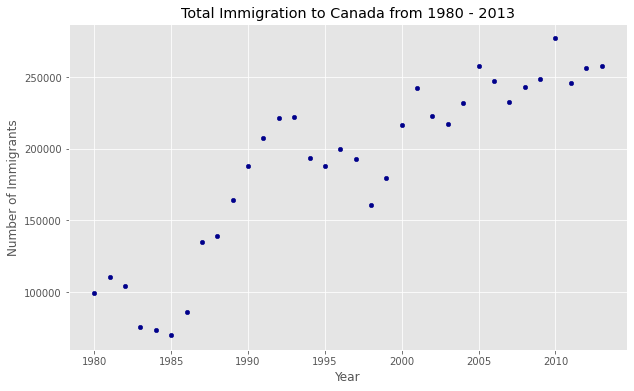

In [44]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [45]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

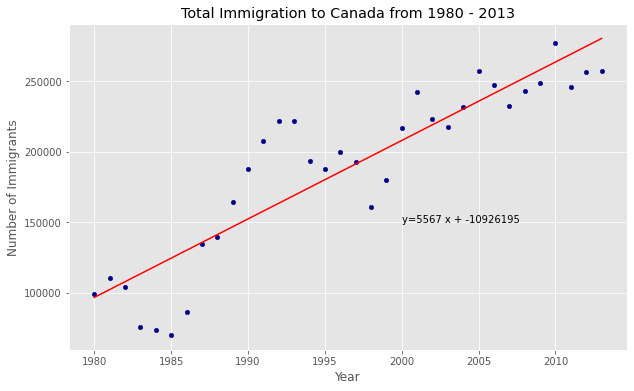

'No. Immigrants = 5567 * Year + -10926195'

In [46]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [48]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [52]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [57]:
# reset index in place
df_total.reset_index(inplace=True)

In [59]:
# rename columns
df_total.columns = ['year', 'total']

In [61]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

In [62]:
df_total.head()

,year,total
0,1980,669.0
1,1981,678.0
2,1982,627.0
3,1983,333.0
4,1984,252.0


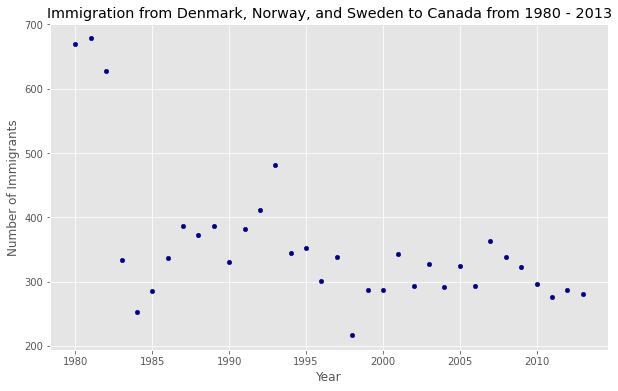

In [63]:
  # generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

    # show plot
plt.show()

# BUBBLE PLOTS

In [65]:
# transposed dataframe
df_can_t = df_can[years].transpose()

In [71]:
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

In [73]:
# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

In [75]:
# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

In [76]:
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16.0,1.0,80.0,0.0,0.0,1.0,0.0,368.0,0.0,...,9378.0,128.0,0.0,0.0,103.0,1191.0,0.0,1.0,11.0,72.0
1,1981,39.0,0.0,67.0,1.0,0.0,3.0,0.0,426.0,0.0,...,10030.0,132.0,0.0,0.0,117.0,1829.0,0.0,2.0,17.0,114.0
2,1982,39.0,0.0,71.0,0.0,0.0,6.0,0.0,626.0,0.0,...,9074.0,146.0,0.0,0.0,174.0,2162.0,0.0,1.0,11.0,102.0
3,1983,47.0,0.0,69.0,0.0,0.0,6.0,0.0,241.0,0.0,...,7100.0,105.0,0.0,0.0,124.0,3404.0,0.0,6.0,7.0,44.0
4,1984,71.0,0.0,63.0,0.0,0.0,4.0,42.0,237.0,0.0,...,6661.0,90.0,0.0,0.0,142.0,7583.0,0.0,0.0,16.0,32.0


In [77]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

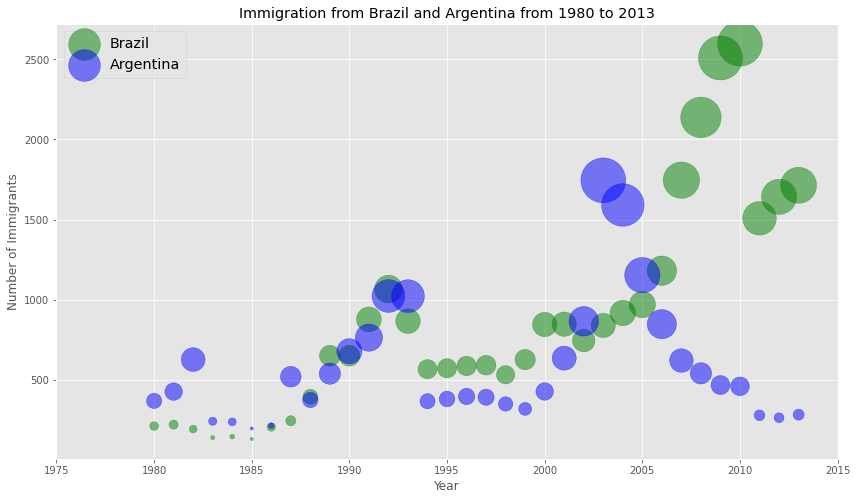

In [78]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

In [79]:
   # normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
    # normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

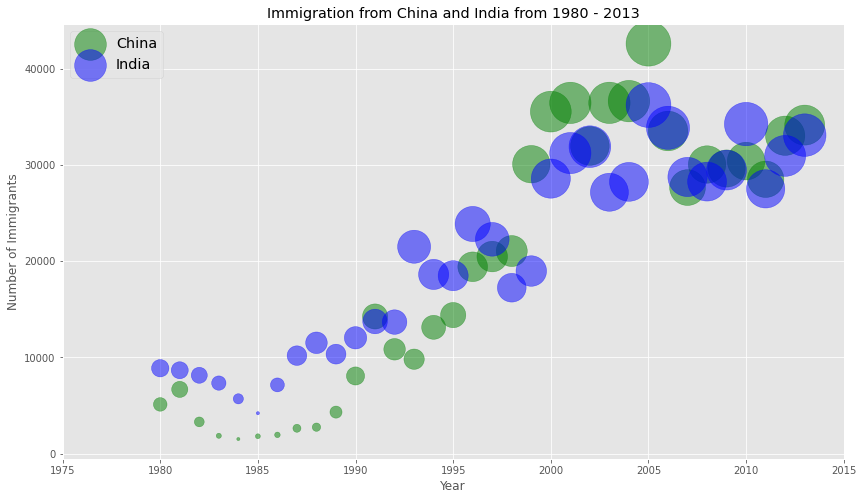

In [80]:
# China
ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')